In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# Predicted Bike Rentals
<p>Hadi Fanaee-T compiled data on the number of bicycles people rent per hour and day in Washington, D.C while he was at the University of Porto. The data set can be downloaded <a href="http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">here</a></p>
<p><b>Research question: predict the total number of bikes people rented in a given hour. </b></p>

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Explanation of the columns:
<ul>
<li>`instant`: unique sequential ID number for each row,</li>
<li>`dteday`: the date of the rentals</li>
<li>`season`: the season the rentals occurred</li>
<li>`yr`: the year the rentals occurred</li>
<li>`mnth`: The month the rentals occurred</li>
<li>'hr': the hour the bike was rented,</li>
<li>`holiday`: whether or not the day was a holiday </li>
<li>`weekday`: the day of the week (as a number, 0 to 7)</li>
<li>`workingday`: whether or not the day was a working day</li>
<li>`weathersit`: the weather (as a categorical variable) </li>
<li>`temp`: the temperature on a scale 0-1,</li>
<li>`atemp`: the adjusted temperature,</li>
<li>`hum`: the humidity on a scale from 0-1,</li>
<li>`windspeed`: the wind speed, on a 0-1 scale</li>
<li>`casual`: the number of casual riders (people who hadn't previously signed up with the bike sharing program)</li>
<li>`registered`: the number of registered riders (people who had already signed up) </li>
<li>`cnt`: the total number of bike rentals (`casual` + `registered`) </li>
</ul>

## Data Analysis and Cleaning

In [3]:
bike_rentals.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
bike_rentals.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
bike_rentals['dteday'] = pd.to_datetime(bike_rentals['dteday'], 
                                        format = '%Y-%m-%d'
                                       )

What does the `1` and `0` stand for in `yr`?

In [7]:
bike_rentals['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [8]:
pd.DatetimeIndex(bike_rentals['dteday']).year.value_counts()

2012    8734
2011    8645
Name: dteday, dtype: int64

In [9]:
pd.DatetimeIndex(bike_rentals[bike_rentals['yr'] == 1]['dteday']).year.value_counts()

2012    8734
Name: dteday, dtype: int64

Some quick `value_counts` of other columns to learn more about the information they hold:

In [10]:
bike_rentals.shape

(17379, 17)

In [11]:
workdays = [1,2,3,4,5]
workday_or_holiday = bike_rentals[bike_rentals['weekday'].isin(workdays)]
print(workday_or_holiday.shape)
print('Sum of holidays and workingdays : \n',workday_or_holiday[['holiday','workingday']].sum())
print('overlaps? : \n',workday_or_holiday[['holiday','workingday']].sum(axis = 1).value_counts())

(12365, 17)
Sum of holidays and workingdays : 
 holiday         500
workingday    11865
dtype: int64
overlaps? : 
 1    12365
dtype: int64


There are some columns, which will not contribute to predicting bike counts. E.g. the column `instant` contains no valueble information for our predictions as it is just the ID for the row. The columns `casual` and `registered` yield the target column `cnt`. Hence, they will display a high correlation without adding any information. I will drop these three columns for now:

In [12]:
bike_rentals.drop(columns = ['instant','casual','registered'], inplace = True)

Next, I will modify the `hr` column:

In [13]:
def assign_label(hour):
    if hour <6:
        return 4
    elif hour<12 and hour>=6:
        return 1
    elif hour<18 and hour>=12:
        return 2
    else:
        return 3
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label).astype('category')

Which varaibles are categorical?

`season`, any column referring to dates, and `weathersit` display values belonging to a category rather than an interval or ratio scale. 

In [14]:
categorical_columns = ['season',
                       'weathersit',
                       'holiday',
                       'yr',
                       'mnth',
                       'hr',
                       'weekday',
                       'workingday',
                       'time_label'
                      ]


Which of the categorical varaibles are connected?

In [15]:
for col in categorical_columns:
    bike_rentals[col] = bike_rentals[col].astype('category')

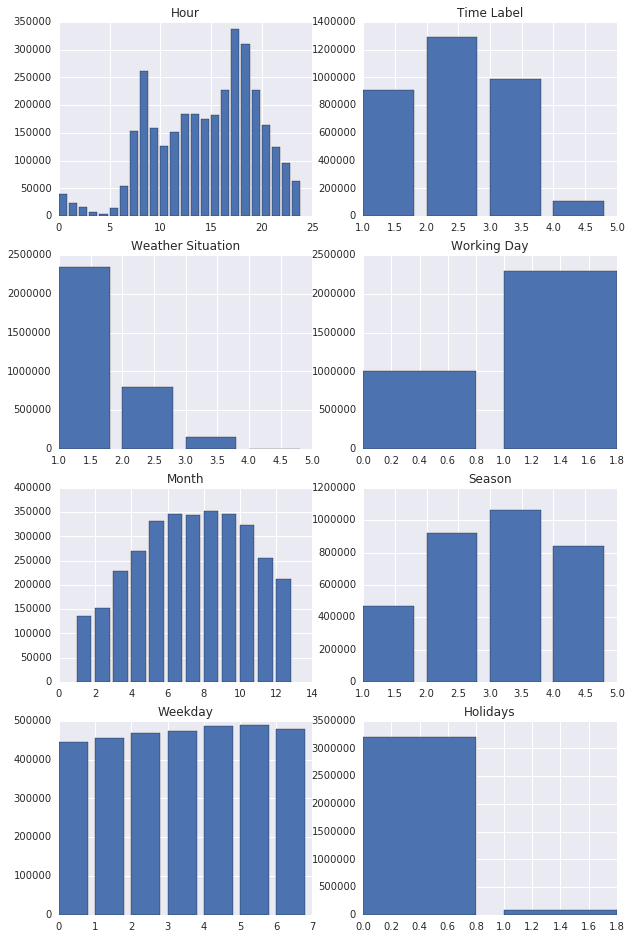

In [16]:
plt.figure(figsize=(10, 16))

plt.subplot(4, 2, 1)
x = bike_rentals.groupby('hr')['cnt'].sum().index
y = bike_rentals.groupby('hr')['cnt'].sum()
plt.bar(x,y)
plt.title('Hour')

plt.subplot(4, 2, 2)
x = bike_rentals.groupby('time_label')['cnt'].sum().index
y = bike_rentals.groupby('time_label')['cnt'].sum()
plt.bar(x,y)
plt.title('Time Label')


plt.subplot(4, 2, 3)
x = bike_rentals.groupby('weathersit')['cnt'].sum().index
y = bike_rentals.groupby('weathersit')['cnt'].sum()
plt.bar(x,y)
plt.title('Weather Situation')

plt.subplot(4, 2, 4)
x = bike_rentals.groupby('workingday')['cnt'].sum().index
y = bike_rentals.groupby('workingday')['cnt'].sum()
plt.bar(x,y)
plt.title('Working Day')

plt.subplot(4, 2, 5)
x = bike_rentals.groupby('mnth')['cnt'].sum().index
y = bike_rentals.groupby('mnth')['cnt'].sum()
plt.bar(x,y)
plt.title('Month')

plt.subplot(4, 2, 6)
x = bike_rentals.groupby('season')['cnt'].sum().index
y = bike_rentals.groupby('season')['cnt'].sum()
plt.bar(x,y)
plt.title('Season')

plt.subplot(4, 2, 7)
x = bike_rentals.groupby('weekday')['cnt'].sum().index
y = bike_rentals.groupby('weekday')['cnt'].sum()
plt.bar(x,y)
plt.title('Weekday')

plt.subplot(4, 2, 8)
x = bike_rentals.groupby('holiday')['cnt'].sum().index
y = bike_rentals.groupby('holiday')['cnt'].sum()
plt.bar(x,y)
plt.title('Holidays')

plt.show()

`yr`, `month`, and `season` are clearly connected. I will only keep one of them for the linear regression. `weekday` has very little variance, hence will be discarded. `workingday` and `holiday` display the same information. `hr` is replaced by `time_label`, but `time_label` should be made more granular. The column `tdeday` will not be usable for linear regression, so I will drop it as well. I will create a new dataframe, where I will drop the columns as described:

In [17]:
def assign_label(hour):
    if hour <7 and hour >3:
        return 6
    elif hour<11 and hour>=7:
        return 1
    elif hour<15 and hour>=11:
        return 2
    elif hour<19 and hour>=15:
        return 3
    elif hour<23 and hour>=19:
        return 4
    else:
        return 5
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label).astype('category')

bike_rentals_relevant = bike_rentals.drop(columns = ['yr',
                                                    'mnth',
                                                    'weekday',
                                                    'hr',
                                                     'dteday',
                                                     'holiday'
                                                   ])

In [18]:
bike_rentals_relevant.dtypes

season        category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
time_label    category
dtype: object

## Correlation between columns

Next, I will check the correlation of the numerical columns to the column `cnt` to see which ones are more relevant than others:

In [19]:
ranking_corr = np.abs(bike_rentals_relevant.corr()['cnt']).sort_values(ascending = False)
ranking_corr

cnt          1.000000
temp         0.404772
atemp        0.400929
hum          0.322911
windspeed    0.093234
Name: cnt, dtype: float64

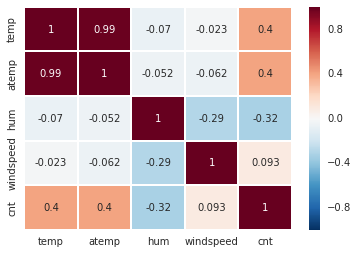

In [20]:
sns.heatmap(bike_rentals_relevant.corr(),annot=True,lw=1)

`temp` and `atemp` are highly correlated. I will drop `atemp` as `temp` has a slightly higher correlation to `cnt`. `windspeed` seems to have a very low correclation as well, hence I will drop it.

In [21]:
bike_rentals_relevant.drop(columns = ['atemp','windspeed'], inplace = True)

Another way to show correlations is with scatter plots. This should reveal whether we find a linear correlation. Or maybe a non-linear one?

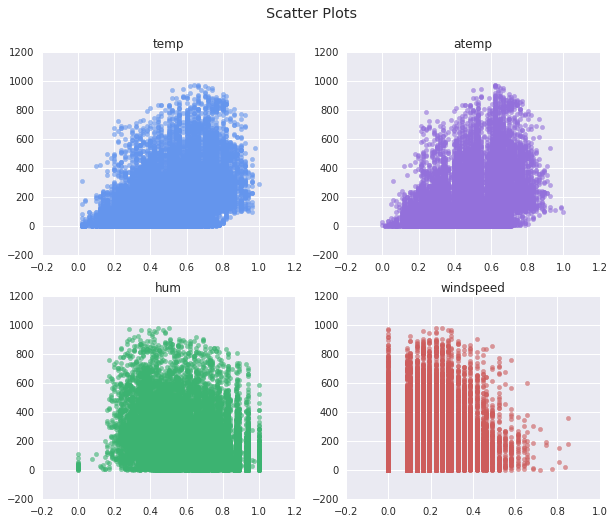

In [22]:
fig = plt.figure(figsize=(10, 8))
st = fig.suptitle("Scatter Plots", fontsize="x-large")

ax1 = fig.add_subplot(221)
ax1.scatter(x = bike_rentals['temp'], y = bike_rentals['cnt'],color = 'cornflowerblue',alpha = 0.6)
ax1.set_title("temp")

ax2 = fig.add_subplot(222)
ax2.scatter(x = bike_rentals['atemp'], y = bike_rentals['cnt'],color = 'mediumpurple',alpha = 0.6)
ax2.set_title("atemp")

ax3 = fig.add_subplot(223)
ax3.scatter(x = bike_rentals['hum'], y = bike_rentals['cnt'], color = 'mediumseagreen',alpha = 0.6)
ax3.set_title("hum")

ax4 = fig.add_subplot(224)
ax4.scatter(x = bike_rentals['windspeed'], y = bike_rentals['cnt'], color = 'indianred',alpha = 0.6)
ax4.set_title("windspeed")


## Dummy variables:
As a next step, I will change the categorical variables (with more than 2 values) into dummy variables:

In [23]:
bike_rentals_relevant.select_dtypes(include = ['category']).nunique()

season        4
workingday    2
weathersit    4
time_label    6
dtype: int64

In [24]:
to_be_dummied = bike_rentals_relevant.select_dtypes(include = ['category'])
columns_dummy_before = to_be_dummied.columns
to_be_dummied = pd.get_dummies(data = to_be_dummied, drop_first = True)

In [25]:
bike_rentals_relevant.drop(columns = columns_dummy_before, inplace = True)
bike_rentals_relevant = pd.concat([bike_rentals_relevant, to_be_dummied], axis = 1)

In [26]:
bike_rentals_relevant.head()

,temp,hum,cnt,season_2,season_3,season_4,workingday_1,weathersit_2,weathersit_3,weathersit_4,time_label_2,time_label_3,time_label_4,time_label_5,time_label_6
0,0.24,0.81,16,0,0,0,0,0,0,0,0,0,0,1,0
1,0.22,0.80,40,0,0,0,0,0,0,0,0,0,0,1,0
2,0.22,0.80,32,0,0,0,0,0,0,0,0,0,0,1,0
3,0.24,0.75,13,0,0,0,0,0,0,0,0,0,0,1,0
4,0.24,0.75,1,0,0,0,0,0,0,0,0,0,0,0,1


## Test and train set:

The trainings set will be 80% of the set and the test set 20%:

In [27]:
train = bike_rentals_relevant.sample(frac = 0.8)
test = bike_rentals_relevant[~(bike_rentals_relevant.index.isin(train.index))]

## Linear regression:
Because many columns have higher correlations, I will use linear regression first.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [29]:
target = 'cnt'
features = train.columns.drop('cnt')

In [30]:
test[features].head()

,temp,hum,season_2,season_3,season_4,workingday_1,weathersit_2,weathersit_3,weathersit_4,time_label_2,time_label_3,time_label_4,time_label_5,time_label_6
4,0.24,0.75,0,0,0,0,0,0,0,0,0,0,0,1
5,0.24,0.75,0,0,0,0,1,0,0,0,0,0,0,1
8,0.24,0.75,0,0,0,0,0,0,0,0,0,0,0,0
11,0.36,0.81,0,0,0,0,0,0,0,1,0,0,0,0
12,0.42,0.77,0,0,0,0,0,0,0,1,0,0,0,0


All features:

In [31]:
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions_lr = lr.predict(test[features])
rmse = np.sqrt(mean_squared_error(test[target], predictions_lr))
rmse

123.15222104191663

Am I overfitting?

In [32]:
kf = KFold(n_splits = 5)
rmses_test = []
rmses_train = []
for train_index,test_index in kf.split(bike_rentals_relevant[features]):
    X_train, X_test = bike_rentals_relevant[features].iloc[train_index], bike_rentals_relevant[features].iloc[test_index]
    y_train, y_test = bike_rentals_relevant[target].iloc[train_index], bike_rentals_relevant[target].iloc[test_index]
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    prediction_test = lr.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, prediction_test))
    rmses_test.append(rmse_test)
    
    prediction_train = lr.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, prediction_train))
    rmses_train.append(rmse_train)
print('mean rmse test : ',np.mean(rmses_test),'\n','std rmse test: ',np.std(rmses_test))
print('mean rmse train : ',np.mean(rmses_train),'\n','std rmse train: ',np.std(rmses_train))

mean rmse test :  140.54782563377097 
 std rmse test:  24.716273917844124
mean rmse train :  122.4853611340554 
 std rmse train:  6.831253554371986


I actually might be overfitting. Let's have a look at the different rmses in detail:

In [33]:
rmses_train

[128.94255278090236,
 125.70694122402931,
 129.16765982001522,
 115.47972910216487,
 113.12992274316521]

In [34]:
rmses_test

[118.00250376675098,
 133.43456054029184,
 112.31070187486826,
 166.15733668049606,
 172.83402530644764]

This looks like I am overfitting. Time to look at how well each column and the combination of those contribute:

rmses for each column of column set (for categorical variables):

In [35]:
features_int = bike_rentals_relevant.select_dtypes(include = ['int','float']).columns.drop('cnt')
features_cat = features.drop(features_int)

In [36]:
feat_season = features_cat[features_cat.str.contains('season')]
feat_workingday = features_cat[features_cat.str.contains('workingday')]
feat_weather = features_cat[features_cat.str.contains('weather')]
feat_time = features_cat[features_cat.str.contains('time')]

In [37]:
rmses_features = {}
for feat in features_int:
    lr = LinearRegression()
    lr.fit(train[[feat]], train[target])
    predictions_lr = lr.predict(test[[feat]])
    rmse = np.sqrt(mean_squared_error(test[target], predictions_lr))
    rmses_features[feat] = rmse
    
for feat_sub in [feat_season,feat_workingday,feat_weather,feat_time]:
    name = re.search('([^0-9_]+)',feat_sub[0]).group(0)
    lr = LinearRegression()
    lr.fit(train[feat_sub], train[target])
    predictions_lr = lr.predict(test[feat_sub])
    rmse = np.sqrt(mean_squared_error(test[target], predictions_lr))
    rmses_features[name] = rmse
rmses_features    

{'hum': 171.50362938669298,
 'season': 174.80862059181672,
 'temp': 165.8311952010208,
 'time': 139.13285965329706,
 'weathersit': 179.35592002295138,
 'workingday': 181.11243198721218}

I will now only take `time` and `temperature` into account:

In [38]:
features_new = ['temp', 
                'time_label_2',
                'time_label_3', 
                'time_label_4', 
                'time_label_5', 
                'time_label_6'
               ]

In [39]:
kf = KFold(n_splits = 5)
rmses_test = []
rmses_train = []
for train_index,test_index in kf.split(bike_rentals_relevant[features_new]):
    X_train, X_test = bike_rentals_relevant[features_new].iloc[train_index], bike_rentals_relevant[features_new].iloc[test_index]
    y_train, y_test = bike_rentals_relevant[target].iloc[train_index], bike_rentals_relevant[target].iloc[test_index]
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    prediction_test = lr.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, prediction_test))
    rmses_test.append(rmse_test)
    
    prediction_train = lr.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, prediction_train))
    rmses_train.append(rmse_train)
print('mean rmse test : ',np.mean(rmses_test),'\n','std rmse test: ',np.std(rmses_test))
print('mean rmse train : ',np.mean(rmses_train),'\n','std rmse train: ',np.std(rmses_train))

mean rmse test :  138.0022391647527 
 std rmse test:  27.203893892359318
mean rmse train :  127.62073839574607 
 std rmse train:  7.297880948267125


There is still some difference in the rmse between the test and the train set. I'm wondering whether linear regression is just not a good approach for this problem.

Now only time:

In [40]:
features_new = [
                'time_label_2',
                'time_label_3', 
                'time_label_4', 
                'time_label_5', 
                'time_label_6'
               ]

In [41]:
kf = KFold(n_splits = 5)
rmses_test = []
rmses_train = []
for train_index,test_index in kf.split(bike_rentals_relevant[features_new]):
    X_train, X_test = bike_rentals_relevant[features_new].iloc[train_index], bike_rentals_relevant[features_new].iloc[test_index]
    y_train, y_test = bike_rentals_relevant[target].iloc[train_index], bike_rentals_relevant[target].iloc[test_index]
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    prediction_test = lr.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, prediction_test))
    rmses_test.append(rmse_test)
    
    prediction_train = lr.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, prediction_train))
    rmses_train.append(rmse_train)
print('Time Label: mean rmse test : ',np.mean(rmses_test),'\n','std rmse test: ',np.std(rmses_test))
print('Time Label: mean rmse train : ',np.mean(rmses_train),'\n','std rmse train: ',np.std(rmses_train))

Time Label: mean rmse test :  146.2683944063512 
 std rmse test:  32.273796227840606
Time Label: mean rmse train :  138.30068805812917 
 std rmse train:  7.753773230000445


And now only temperature:

In [42]:
features_new = ['temp'
               ]

In [43]:
kf = KFold(n_splits = 5)
rmses_test = []
rmses_train = []
for train_index,test_index in kf.split(bike_rentals_relevant[features_new]):
    X_train, X_test = bike_rentals_relevant[features_new].iloc[train_index], bike_rentals_relevant[features_new].iloc[test_index]
    y_train, y_test = bike_rentals_relevant[target].iloc[train_index], bike_rentals_relevant[target].iloc[test_index]
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    prediction_test = lr.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, prediction_test))
    rmses_test.append(rmse_test)
    
    prediction_train = lr.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, prediction_train))
    rmses_train.append(rmse_train)
print('Temperature: mean rmse test : ',np.mean(rmses_test),'\n','std rmse test: ',np.std(rmses_test))
print('Temperature: mean rmse train : ',np.mean(rmses_train),'\n','std rmse train: ',np.std(rmses_train))

Temperature: mean rmse test :  166.50640999120716 
 std rmse test:  45.93650065030365
Temperature: mean rmse train :  164.78642892387003 
 std rmse train:  11.112385905241483


I conclude that this data set is not well working for linear regression. After all, the correlations between the features and the target column weren't that strong.

## Decision tree algorithm:

I will apply the random forst algorithm to the data set to see whether it works better (and play around with parameters). Additionally, I will test that I don't overfit as random forests tend to do that.

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

dt = DecisionTreeRegressor()
dt.fit(train[features],train[target])
pred_dt = dt.predict(test[features])
rmse = np.sqrt(mean_squared_error(pred_dt, test[target]))
rmse

131.66826136783934

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train[features],train[target])
pred_rf = rf.predict(test[features])
rmse = np.sqrt(mean_squared_error(pred_rf, test[target]))
rmse

113.24286737172896

In [46]:
kf = KFold(n_splits = 5)
rmses_test = []
rmses_train = []
for train_index,test_index in kf.split(bike_rentals_relevant[features]):
    X_train, X_test = bike_rentals_relevant[features].iloc[train_index], bike_rentals_relevant[features].iloc[test_index]
    y_train, y_test = bike_rentals_relevant[target].iloc[train_index], bike_rentals_relevant[target].iloc[test_index]
    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    prediction_test = rf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, prediction_test))
    rmses_test.append(rmse_test)
    
    prediction_train = rf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, prediction_train))
    rmses_train.append(rmse_train)
print('Temperature: mean rmse test : ',np.mean(rmses_test),'\n','std rmse test: ',np.std(rmses_test))
print('Temperature: mean rmse train : ',np.mean(rmses_train),'\n','std rmse train: ',np.std(rmses_train))

Temperature: mean rmse test :  141.79214365236888 
 std rmse test:  19.540453887761235
Temperature: mean rmse train :  67.11504590964947 
 std rmse train:  4.375266425459497


Taking all features and parameters as default, I massively overfit. However, still with overfitting, the rmses for both the train and test set are better than my best linear regression rmse.

In [47]:
features_new = ['temp', 
                'time_label_2',
                'time_label_3', 
                'time_label_4', 
                'time_label_5', 
                'time_label_6'
               ]

In [48]:
kf = KFold(n_splits = 5)
rmses_test = []
rmses_train = []
for train_index,test_index in kf.split(bike_rentals_relevant[features_new]):
    X_train, X_test = bike_rentals_relevant[features_new].iloc[train_index], bike_rentals_relevant[features_new].iloc[test_index]
    y_train, y_test = bike_rentals_relevant[target].iloc[train_index], bike_rentals_relevant[target].iloc[test_index]
    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    prediction_test = rf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, prediction_test))
    rmses_test.append(rmse_test)
    
    prediction_train = rf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, prediction_train))
    rmses_train.append(rmse_train)
print('Temperature: mean rmse test : ',np.mean(rmses_test),'\n','std rmse test: ',np.std(rmses_test))
print('Temperature: mean rmse train : ',np.mean(rmses_train),'\n','std rmse train: ',np.std(rmses_train))

Temperature: mean rmse test :  132.54236171865423 
 std rmse test:  27.18329646499523
Temperature: mean rmse train :  119.82948094238425 
 std rmse train:  7.104306298162168


Taking only the most correlated features into account yields a worse result and has a rmse similar to linear regression. Next, I will try a few parameters while using all features:

In [49]:
kf = KFold(n_splits = 5)
rmses_test = []
rmses_train = []
for train_index,test_index in kf.split(bike_rentals_relevant[features]):
    X_train, X_test = bike_rentals_relevant[features].iloc[train_index], bike_rentals_relevant[features].iloc[test_index]
    y_train, y_test = bike_rentals_relevant[target].iloc[train_index], bike_rentals_relevant[target].iloc[test_index]
    rf = RandomForestRegressor(n_estimators = 5, min_samples_leaf = 4, max_depth = 4)
    rf.fit(X_train,y_train)
    
    prediction_test = rf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, prediction_test))
    rmses_test.append(rmse_test)
    
    prediction_train = rf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, prediction_train))
    rmses_train.append(rmse_train)
print('Temperature: mean rmse test : ',np.mean(rmses_test),'\n','std rmse test: ',np.std(rmses_test))
print('Temperature: mean rmse train : ',np.mean(rmses_train),'\n','std rmse train: ',np.std(rmses_train))

Temperature: mean rmse test :  134.64841124952451 
 std rmse test:  25.72277705274834
Temperature: mean rmse train :  121.25568776000975 
 std rmse train:  6.586324424183633


Now the random forest is less overfitting and the rmse is lower than the best result I got with linear regression.